## 1. Importing Data

In [113]:
#importing libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [114]:
#adding data city of london
may_21 = pd.read_csv('2021-05-city-of-london-street.csv')
jun_21 = pd.read_csv('2021-06-city-of-london-street.csv')
jul_21 = pd.read_csv('2021-07-city-of-london-street.csv')
aug_21 = pd.read_csv('2021-08-city-of-london-street.csv')
sep_21 = pd.read_csv('2021-09-city-of-london-street.csv')
oct_21 = pd.read_csv('2021-10-city-of-london-street.csv')
nov_21 = pd.read_csv('2021-11-city-of-london-street.csv')
dec_21 = pd.read_csv('2021-12-city-of-london-street.csv')
jan_22 = pd.read_csv('2022-01-city-of-london-street.csv')
feb_22 = pd.read_csv('2022-02-city-of-london-street.csv')
mar_22 = pd.read_csv('2022-03-city-of-london-street.csv')
apr_22 = pd.read_csv('2022-04-city-of-london-street.csv')
may_22 = pd.read_csv('2022-05-city-of-london-street.csv')

## 2. Preprocessing Data

combining all the months for easier handling

In [115]:
data = pd.concat([may_21, jun_21 , jul_21, aug_21, sep_21, oct_21, nov_21, dec_21, jan_22, feb_22, mar_22, apr_22, may_22])

Looking at what column does the data have

In [116]:
data.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

Dropping the unnecessary columns

In [117]:
data = data.drop(data.columns[[0,2,3,10,11]],axis=1)
#axis = 1 means that the operation are perform on the columns of the DataFrame

In [118]:
data

,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2021-05,-0.109582,51.522017,On or near Clerkenwell Road,E01000916,Camden 027B,Drugs
1,2021-05,-0.111962,51.518494,On or near Nightclub,E01000914,Camden 028B,Public order
2,2021-05,-0.113256,51.516824,On or near Old Square,E01000914,Camden 028B,Theft from the person
3,2021-05,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour
4,2021-05,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,City of London 001A,Anti-social behaviour
...,...,...,...,...,...,...,...
713,2022-05,NaN,NaN,No Location,NaN,NaN,Other crime
714,2022-05,NaN,NaN,No Location,NaN,NaN,Other crime
715,2022-05,NaN,NaN,No Location,NaN,NaN,Other crime
716,2022-05,NaN,NaN,No Location,NaN,NaN,Other crime


Removing the rows with any NaN

In [119]:
data = data.dropna()
data

,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2021-05,-0.109582,51.522017,On or near Clerkenwell Road,E01000916,Camden 027B,Drugs
1,2021-05,-0.111962,51.518494,On or near Nightclub,E01000914,Camden 028B,Public order
2,2021-05,-0.113256,51.516824,On or near Old Square,E01000914,Camden 028B,Theft from the person
3,2021-05,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour
4,2021-05,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,City of London 001A,Anti-social behaviour
...,...,...,...,...,...,...,...
659,2022-05,-0.074901,51.506255,On or near A100,E01004293,Tower Hamlets 027B,Other theft
660,2022-05,-0.079130,51.507808,On or near Ferry Terminal,E01004293,Tower Hamlets 027B,Robbery
661,2022-05,-0.079130,51.507808,On or near Ferry Terminal,E01004293,Tower Hamlets 027B,Robbery
662,2022-05,-0.074901,51.506255,On or near A100,E01004293,Tower Hamlets 027B,Theft from the person


Looking at the data type of each column

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7856 entries, 0 to 663
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       7856 non-null   object 
 1   Longitude   7856 non-null   float64
 2   Latitude    7856 non-null   float64
 3   Location    7856 non-null   object 
 4   LSOA code   7856 non-null   object 
 5   LSOA name   7856 non-null   object 
 6   Crime type  7856 non-null   object 
dtypes: float64(2), object(5)
memory usage: 491.0+ KB


Finding how many LSOA are there and what are there

In [121]:
print('Number of LSOA: ', data['LSOA name'].nunique())
data['LSOA name'].unique()

Number of LSOA:  60


array(['Camden 027B', 'Camden 028B', 'City of London 001A',
       'City of London 001B', 'City of London 001C',
       'City of London 001E', 'City of London 001F',
       'City of London 001G', 'Hackney 027F', 'Islington 022D',
       'Islington 023D', 'Islington 023E', 'Southwark 002C',
       'Tower Hamlets 009C', 'Tower Hamlets 015B', 'Tower Hamlets 021C',
       'Tower Hamlets 021D', 'Tower Hamlets 021F', 'Tower Hamlets 027B',
       'Westminster 018A', 'Hackney 025D', 'Hackney 027G',
       'Islington 022H', 'Southwark 003H', 'Tower Hamlets 019C',
       'Westminster 018B', 'Haringey 015C', 'Tower Hamlets 018D',
       'Islington 014C', 'Newham 013G', 'Southwark 001C',
       'Tower Hamlets 021E', 'Westminster 020C', 'Camden 024B',
       'Hackney 019A', 'Hackney 022D', 'Southwark 003E', 'Southwark 006E',
       'Tower Hamlets 017A', 'Islington 003B', 'Tower Hamlets 025B',
       'Waltham Forest 015B', 'Westminster 018C', 'Tower Hamlets 015E',
       'Tower Hamlets 026B', 'Walth

## 3. Exploratory Data Analysis (EDA)

In [122]:
crime = data['Crime type'].unique()
crime

array(['Drugs', 'Public order', 'Theft from the person',
       'Anti-social behaviour', 'Bicycle theft', 'Burglary',
       'Vehicle crime', 'Criminal damage and arson', 'Other theft',
       'Violence and sexual offences', 'Other crime',
       'Possession of weapons', 'Robbery', 'Shoplifting'], dtype=object)

In [123]:
crime_type = pd.DataFrame(data['Crime type'].value_counts())
crime_type.iloc[:,]


,Crime type
Violence and sexual offences,1355
Other theft,1228
Anti-social behaviour,984
Theft from the person,977
Shoplifting,750
Drugs,618
Public order,562
Criminal damage and arson,311
Bicycle theft,274
Burglary,268


Plotting the distribution of rate crime type for each month

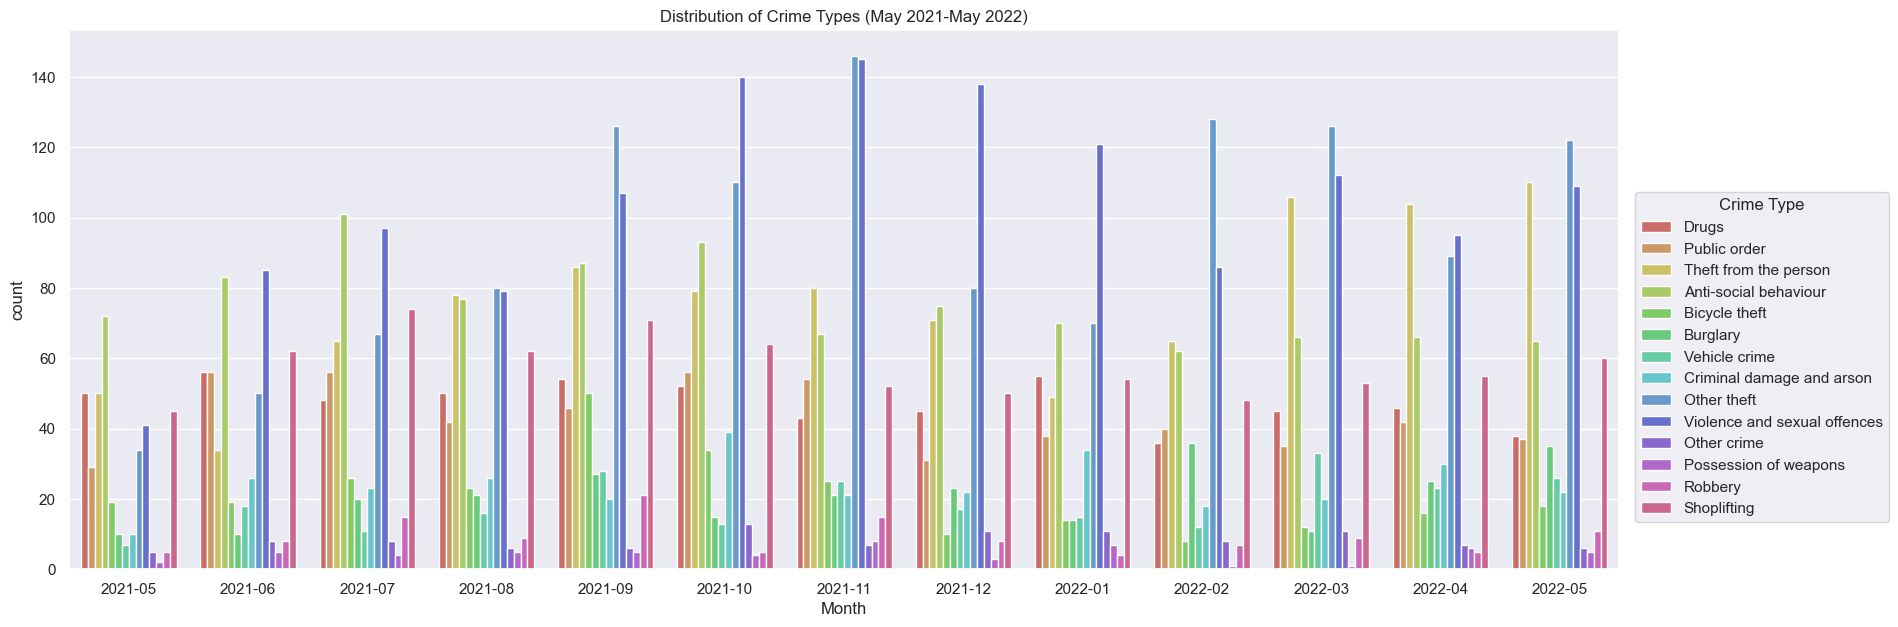

In [124]:
sns.set(rc={'figure.figsize': (20,7)})
graph = sns.countplot(x ='Month', data = data, hue = 'Crime type', palette= 'hls').set(title='Distribution of Crime Types (May 2021-May 2022)')
plt.legend(bbox_to_anchor=(1.01, 0.7), loc='upper left', borderaxespad=0, title='Crime Type')

Violence and Sexual Offences is choosen as it is the highest type of crime rate 

In [125]:
vso =data[data['Crime type'].str.startswith('Violence and sexual offences')]
vso

,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
42,2021-05,-0.092297,51.518949,On or near Park/Open Space,E01000002,City of London 001B,Violence and sexual offences
47,2021-05,-0.094468,51.521853,On or near Golden Lane,E01000003,City of London 001C,Violence and sexual offences
74,2021-05,-0.074210,51.511711,On or near Portsoken Street,E01000005,City of London 001E,Violence and sexual offences
75,2021-05,-0.076435,51.513627,On or near Aldgate,E01000005,City of London 001E,Violence and sexual offences
76,2021-05,-0.075722,51.511053,On or near Crescent,E01000005,City of London 001E,Violence and sexual offences
...,...,...,...,...,...,...,...
650,2022-05,-0.091732,51.521080,On or near Nightclub,E01002704,Islington 023D,Violence and sexual offences
651,2022-05,-0.091732,51.521080,On or near Nightclub,E01002704,Islington 023D,Violence and sexual offences
653,2022-05,-0.077601,51.518799,On or near Steward Street,E01004307,Tower Hamlets 015B,Violence and sexual offences
654,2022-05,-0.077601,51.518799,On or near Steward Street,E01004307,Tower Hamlets 015B,Violence and sexual offences


The CRS for latitude and longitude is WGS84 or ESPG:4326

## 4. Preprocessing Shapefile

In [126]:
shapefile = gpd.read_file('LSOA_2011_London_gen_MHW.shp')

In [127]:
shapefile.columns

Index(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM',
       'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN',
       'HHOLDS', 'AVHHOLDSZ', 'geometry'],
      dtype='object')

In [128]:
LSOA = shapefile[shapefile['LSOA11NM'].str.startswith('City of London')]
LSOA

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.770, 533649.063 18..."
4674,E01032739,City of London 001F,E02000001,City of London 001,E09000001,City of London,E12000007,London,1044,1002,42,6.3,676,1.5,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
4675,E01032740,City of London 001G,E02000001,City of London 001,E09000001,City of London,E12000007,London,1099,1049,50,17.2,719,1.5,"POLYGON ((532022.374 181893.469, 532021.188 18..."


There are only 6 LSOA shapefile polygon for City of London

<AxesSubplot:>

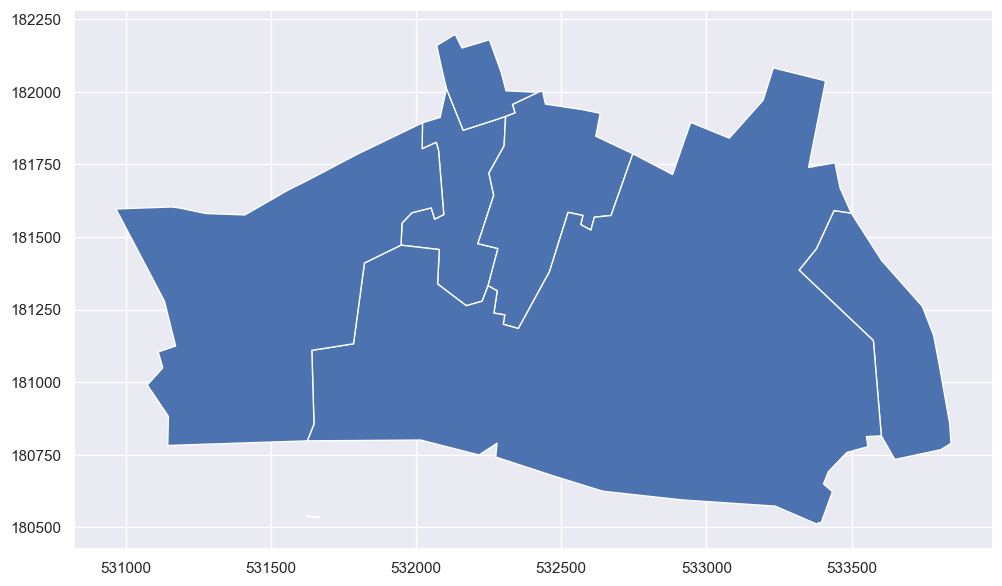

In [129]:
LSOA.plot()

In [130]:
#exporting the City of London LSOA to a file
LSOA.to_file('LSOA_City_of_London')

## 5. Transforming CRS for VSO 

The datasets of the Violence and sexual Offences are in latlong and we aave to convert it to Easting and Northing to be able to plot in the same CRS as the LSOA City of London Shapefile

In [131]:
#latlong to easting/northing - making the transformer
from pyproj import crs
from pyproj import Transformer
transformer = Transformer.from_crs('EPSG:4326', 'EPSG:27700')


In [132]:
vso

,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
42,2021-05,-0.092297,51.518949,On or near Park/Open Space,E01000002,City of London 001B,Violence and sexual offences
47,2021-05,-0.094468,51.521853,On or near Golden Lane,E01000003,City of London 001C,Violence and sexual offences
74,2021-05,-0.074210,51.511711,On or near Portsoken Street,E01000005,City of London 001E,Violence and sexual offences
75,2021-05,-0.076435,51.513627,On or near Aldgate,E01000005,City of London 001E,Violence and sexual offences
76,2021-05,-0.075722,51.511053,On or near Crescent,E01000005,City of London 001E,Violence and sexual offences
...,...,...,...,...,...,...,...
650,2022-05,-0.091732,51.521080,On or near Nightclub,E01002704,Islington 023D,Violence and sexual offences
651,2022-05,-0.091732,51.521080,On or near Nightclub,E01002704,Islington 023D,Violence and sexual offences
653,2022-05,-0.077601,51.518799,On or near Steward Street,E01004307,Tower Hamlets 015B,Violence and sexual offences
654,2022-05,-0.077601,51.518799,On or near Steward Street,E01004307,Tower Hamlets 015B,Violence and sexual offences


In [133]:
vso['Easting'], vso['Northing'] = transformer.transform(vso['Latitude'].values, vso['Longitude'].values)
vso


C:\Users\zohar\AppData\Local\Temp\ipykernel_22712\3565046200.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Easting,Northing
42,2021-05,-0.092297,51.518949,On or near Park/Open Space,E01000002,City of London 001B,Violence and sexual offences,532459.001142,181727.999350
47,2021-05,-0.094468,51.521853,On or near Golden Lane,E01000003,City of London 001C,Violence and sexual offences,532299.973377,182047.008921
74,2021-05,-0.074210,51.511711,On or near Portsoken Street,E01000005,City of London 001E,Violence and sexual offences,533735.009271,180955.982406
75,2021-05,-0.076435,51.513627,On or near Aldgate,E01000005,City of London 001E,Violence and sexual offences,533575.020166,181164.986527
76,2021-05,-0.075722,51.511053,On or near Crescent,E01000005,City of London 001E,Violence and sexual offences,533632.018301,180880.051262
...,...,...,...,...,...,...,...,...,...
650,2022-05,-0.091732,51.521080,On or near Nightclub,E01002704,Islington 023D,Violence and sexual offences,532492.019467,181965.995243
651,2022-05,-0.091732,51.521080,On or near Nightclub,E01002704,Islington 023D,Violence and sexual offences,532492.019467,181965.995243
653,2022-05,-0.077601,51.518799,On or near Steward Street,E01004307,Tower Hamlets 015B,Violence and sexual offences,533479.007840,181738.001722
654,2022-05,-0.077601,51.518799,On or near Steward Street,E01004307,Tower Hamlets 015B,Violence and sexual offences,533479.007840,181738.001722


In [134]:
from shapely.geometry import Point
import geopandas as gpd

# Convert Easting and Northing to Point geometry
geometry = gpd.points_from_xy(vso['Easting'], vso['Northing'])
vso_gdf = gpd.GeoDataFrame(vso, geometry=geometry)

# Rename columns
vso_gdf = vso_gdf.rename(columns={'Easting': 'latitude', 'Northing': 'longitude'})
vso_gdf = vso_gdf.drop(data.columns[[1,2]],axis=1)
vso_gdf.head()


,Month,Location,LSOA code,LSOA name,Crime type,latitude,longitude,geometry
42,2021-05,On or near Park/Open Space,E01000002,City of London 001B,Violence and sexual offences,532459.001142,181727.999350,POINT (532459.001 181727.999)
47,2021-05,On or near Golden Lane,E01000003,City of London 001C,Violence and sexual offences,532299.973377,182047.008921,POINT (532299.973 182047.009)
74,2021-05,On or near Portsoken Street,E01000005,City of London 001E,Violence and sexual offences,533735.009271,180955.982406,POINT (533735.009 180955.982)
75,2021-05,On or near Aldgate,E01000005,City of London 001E,Violence and sexual offences,533575.020166,181164.986527,POINT (533575.020 181164.987)
76,2021-05,On or near Crescent,E01000005,City of London 001E,Violence and sexual offences,533632.018301,180880.051262,POINT (533632.018 180880.051)


In [135]:
import pyproj
vso_gdf.crs = pyproj.CRS.from_epsg(27700)
print(vso_gdf.crs)


EPSG:27700


In [136]:
#exporting
vso.to_csv("VSO.csv")

## 6. Clipping data VSO to the Polygon LSOA City of London

In [137]:
#getting the polygon LSOA
city_of_london_shp = gpd.read_file('LSOA_City_of_London')
city_of_london_shp.crs = pyproj.CRS.from_epsg(27700)

print(city_of_london_shp.crs)

EPSG:27700


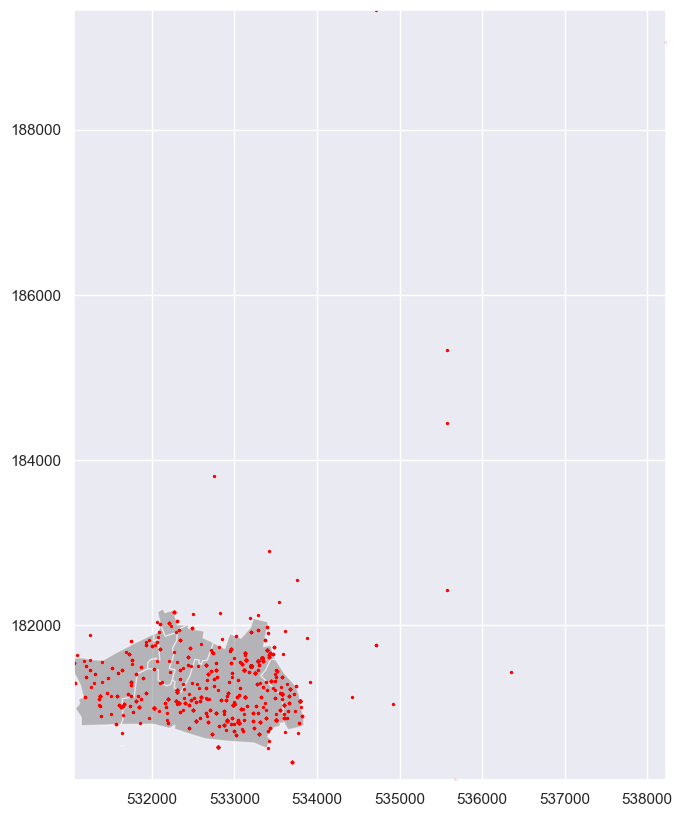

In [138]:
# set plot limits to the extent of the points
xlim = (vso_gdf.total_bounds[0], vso_gdf.total_bounds[2])
ylim = (vso_gdf.total_bounds[1], vso_gdf.total_bounds[3])

# plot the polygon and points using geopandas and matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
city_of_london_shp.plot(ax=ax, alpha=0.5, color='grey')
vso_gdf.plot(ax=ax, markersize=2, color='red')

# set plot limits to the extent of the points
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.show()

In [139]:
# Join point GeoDataFrame with polygon GeoDataFrame
vso_gdf_clipped = gpd.sjoin(vso_gdf, city_of_london_shp, op='within')

# Remove unnecessary columns
vso_gdf_clipped = vso_gdf_clipped.drop(['index_right', 'geometry'], axis=1)

# Print the resulting GeoDataFrame
print(vso_gdf_clipped.head())


       Month                    Location  LSOA code            LSOA name  \
42   2021-05  On or near Park/Open Space  E01000002  City of London 001B   
270  2021-05      On or near Wood Street  E01032739  City of London 001F   
272  2021-05      On or near Wood Street  E01032739  City of London 001F   
36   2021-06  On or near Park/Open Space  E01000002  City of London 001B   
37   2021-06      On or near Wood Street  E01000002  City of London 001B   

                       Crime type       latitude      longitude   LSOA11CD  \
42   Violence and sexual offences  532459.001142  181727.999350  E01000002   
270  Violence and sexual offences  532304.012659  181219.980857  E01000002   
272  Violence and sexual offences  532304.012659  181219.980857  E01000002   
36   Violence and sexual offences  532459.001142  181727.999350  E01000002   
37   Violence and sexual offences  532339.974768  181452.042711  E01000002   

                LSOA11NM   MSOA11CD  ...    LAD11CD         LAD11NM  \
42 

c:\Users\zohar\.conda\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3382: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.



In [140]:
vso_gdf_clipped.columns

Index(['Month', 'Location', 'LSOA code', 'LSOA name', 'Crime type', 'latitude',
       'longitude', 'LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD',
       'LAD11NM', 'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES',
       'POPDEN', 'HHOLDS', 'AVHHOLDSZ'],
      dtype='object')

In [141]:
#arranging the csv according to its month
vso_gdf_clipped= vso_gdf_clipped.sort_values(by=['Month'], ascending=True)
#exporting
vso_gdf_clipped.to_csv("VSO_clipped.csv")

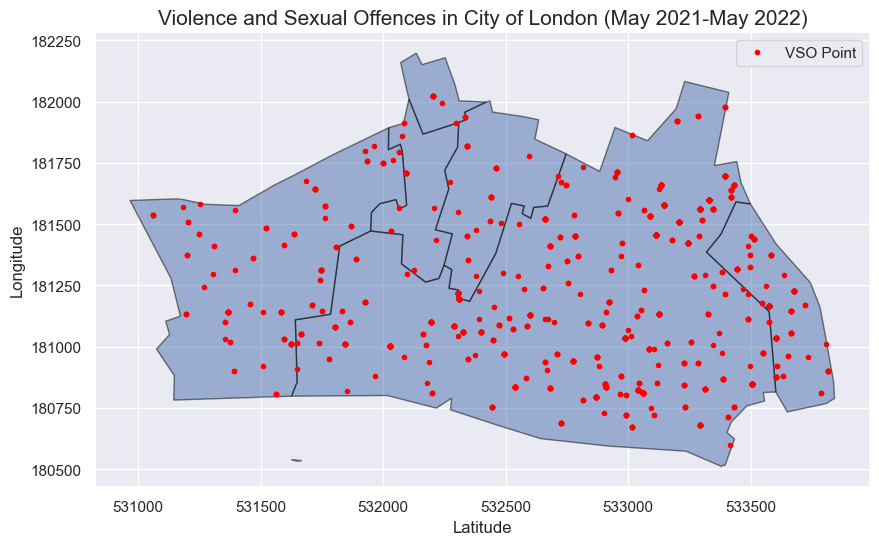

In [142]:

# plot the clipped points and the polygon
fig, ax = plt.subplots(figsize=(10, 10))

# plot the polygon
city_of_london_shp.plot(ax=ax, alpha=0.5, edgecolor='black')

# plot the clipped points
vso_gdf_clipped.plot(ax=ax, x='latitude', y='longitude', color='red', markersize=3, marker='o',linestyle='None',label='VSO Point')


# set plot title
plt.title('Violence and Sexual Offences in City of London (May 2021-May 2022)', fontsize=15)

# set x and y labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)

# show the plot
plt.show()


Looking back again on how many VSO occrence of the months

         Month
2021-05     34
2021-06     69
2021-07     86
2021-08     69
2021-09     94
2021-10    130
2021-11    138
2021-12    128
2022-01    108
2022-02     76
2022-03    104
2022-04     86
2022-05     98
Total:  1220


c:\Users\zohar\.conda\envs\geospatial\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



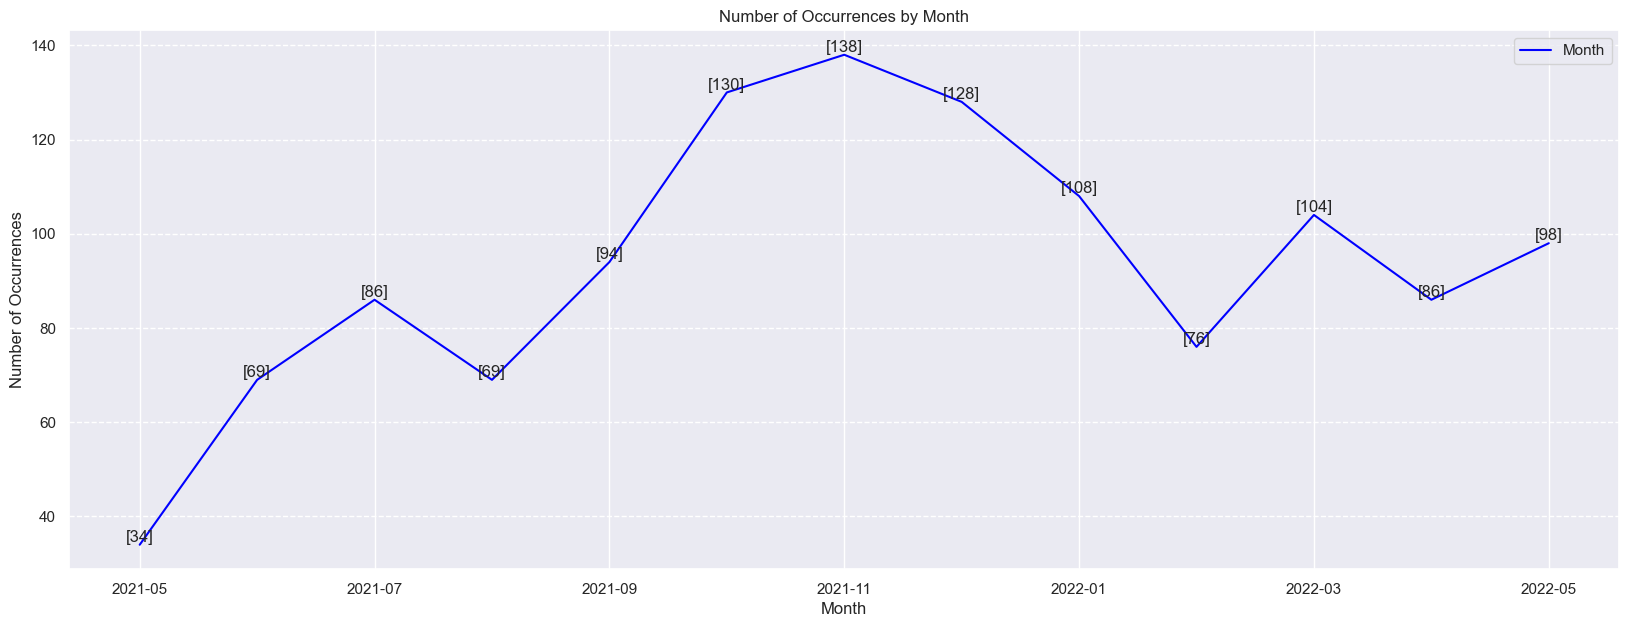

In [143]:
vso_month_clipped = pd.DataFrame(vso_gdf_clipped['Month'].value_counts())
vso_month_clipped  = vso_month_clipped.sort_index()
print(vso_month_clipped )
print('Total: ',vso_month_clipped['Month'].sum() )

# Create a line plot from the vso_month DataFrame
vso_month_clipped.plot(kind='line', color='blue')

# Set the chart title and axis labels
plt.title('Number of Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--')

# Add data labels
for i, val in enumerate(vso_month_clipped .values):
    plt.annotate(str(val), xy=(i, val), ha='center', va='bottom')

# Show the chart
plt.show()

## 7. ESTDA - Kernel Density Estimation (KDE) 

In [144]:
#splitting the datasets to its month
may_21 = vso_gdf_clipped.iloc[:34,]
jun_21 = vso_gdf_clipped.iloc[34:103,]
jul_21 = vso_gdf_clipped.iloc[103:189,]
aug_21 = vso_gdf_clipped.iloc[189:258,]
sep_21 = vso_gdf_clipped.iloc[258:352,]
oct_21 = vso_gdf_clipped.iloc[352:482,]
nov_21 = vso_gdf_clipped.iloc[482:620,]
dec_21 = vso_gdf_clipped.iloc[620:748,]
jan_22 = vso_gdf_clipped.iloc[748:856,]
feb_22 = vso_gdf_clipped.iloc[856:932,]
mar_22 = vso_gdf_clipped.iloc[932:1036,]
apr_22 = vso_gdf_clipped.iloc[1036:1122,]
may_22 = vso_gdf_clipped.iloc[1122:,]

In [145]:
print(may_22.head())

       Month                    Location  LSOA code            LSOA name  \
96   2022-05  On or near St Clare Street  E01000005  City of London 001E   
98   2022-05     On or near Harrow Place  E01000005  City of London 001E   
99   2022-05      On or near Houndsditch  E01000005  City of London 001E   
100  2022-05          On or near Aldgate  E01000005  City of London 001E   
101  2022-05          On or near Aldgate  E01000005  City of London 001E   

                       Crime type       latitude      longitude   LSOA11CD  \
96   Violence and sexual offences  533663.966035  181054.042545  E01000005   
98   Violence and sexual offences  533501.004785  181453.036125  E01000005   
99   Violence and sexual offences  533444.979964  181318.029048  E01000005   
100  Violence and sexual offences  533575.020166  181164.986527  E01000005   
101  Violence and sexual offences  533575.020166  181164.986527  E01000005   

                LSOA11NM   MSOA11CD  ...    LAD11CD         LAD11NM  \
96 

In [146]:
#defining a function for plotting KDE of the different month
#combining the data VSO with epsg:2770 and City of London LSOA shapefile

#read the LSOA shapefile
LSOA_shp = gpd.read_file('LSOA_City_of_London')

#define kde function
def kde(month,data,num):
    i, num = plt.subplots(1, figsize=(12, 10))
    LSOA_shp.plot(color='white', edgecolor='black',ax=num)
    sns.kdeplot( ax=num,x=data['latitude'],y=data['longitude'],data=vso_gdf_clipped, fill=True, cmap='mako', alpha = 0.7, cbar=True, levels=20, thresh=0.05).set(title ='Violence and Sexual offence in City of London of ' + str(month));
    plt.show()

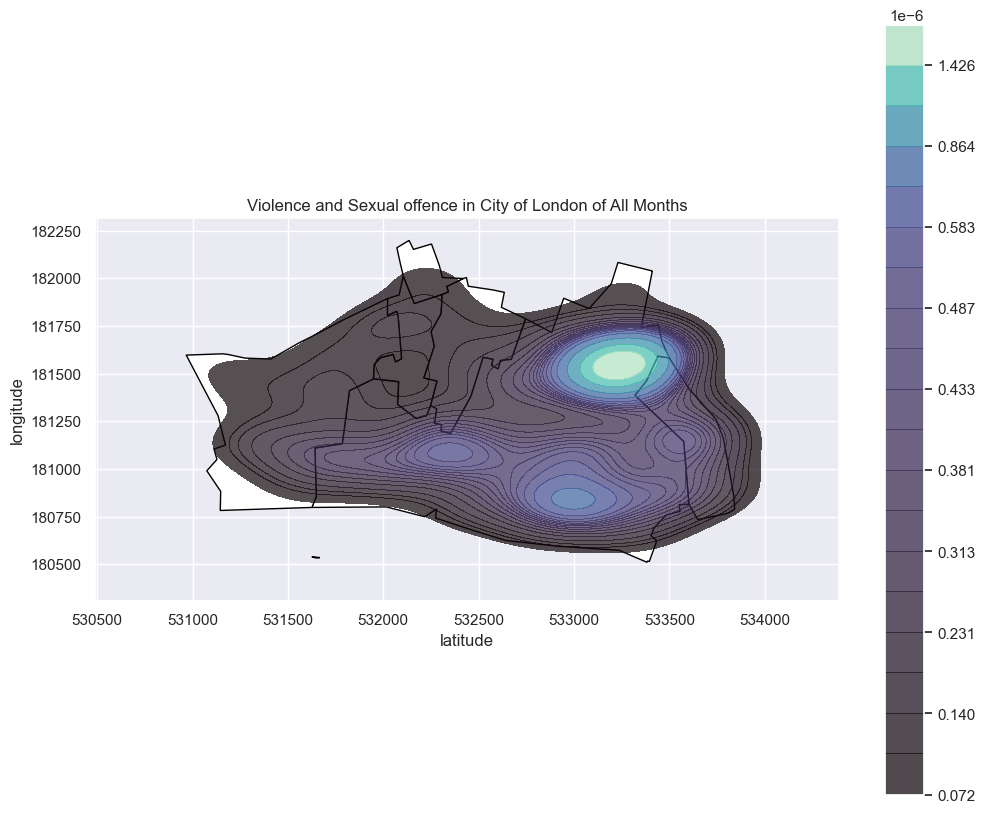

In [147]:
#using the defined function
# kde('May 2021', may_21, 1)
# kde('June 2021', jun_21, 2)
# kde('July 2021', jul_21, 3)
# kde('August 2021', aug_21, 4)
# kde('September 2021', sep_21, 5)
# kde('October 2021', oct_21, 6)
# kde('November 2021', nov_21, 7)
# kde('December 2021', dec_21, 8)
# kde('January 2022', jan_22, 9)
# kde('February 2022', feb_22, 10)
# kde('March 2022', mar_22, 11)
# kde('April 2022', apr_22, 12)
# kde('May 2022', may_22, 13)
kde ('All Months',vso_gdf_clipped , 14)

## 8. ESTDA - Clustering Visualisation

In [148]:
vso_gdf_clipped.head()
print(vso_gdf_clipped.columns)

Index(['Month', 'Location', 'LSOA code', 'LSOA name', 'Crime type', 'latitude',
       'longitude', 'LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD',
       'LAD11NM', 'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES',
       'POPDEN', 'HHOLDS', 'AVHHOLDSZ'],
      dtype='object')


In [149]:
vso_final = vso_gdf_clipped.drop(vso_gdf_clipped.columns[[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20]], axis=1)

In [162]:
#convert column month from string to float
vso_final['Month'] = [float(''.join(x.split('-'))) for x in vso_final['Month']]


In [164]:
vso_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 42 to 52
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      1220 non-null   float64
 1   latitude   1220 non-null   float64
 2   longitude  1220 non-null   float64
dtypes: float64(3)
memory usage: 78.1 KB


In [151]:
import plotly.express as px
# interactive Spatial-temporal data visualation
df = vso_final
fig = px.scatter_3d(df, x='latitude', y='longitude', z='Month', color='Month')
fig.show()

In [165]:
#converting dataframe to array
vso_array = vso_final.to_numpy()
vso_array

array([[202105.        , 532459.00114164, 181727.99935006],
       [202105.        , 533632.01830136, 180880.05126166],
       [202105.        , 533816.01351815, 180899.02510284],
       ...,
       [202205.        , 532439.01985875, 181612.97273824],
       [202205.        , 532753.97759473, 181257.9776419 ],
       [202205.        , 532237.97313122, 181993.98403484]])

In [166]:
#checking the insexing for latitude and logitude columns
vso_array[:,3:5]

array([], shape=(1220, 0), dtype=float64)

In [167]:
vso_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 42 to 52
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      1220 non-null   float64
 1   latitude   1220 non-null   float64
 2   longitude  1220 non-null   float64
dtypes: float64(3)
memory usage: 78.1 KB



## 9. Clustering


### 9.1 DBSCAN

In [172]:
#defining a function for plotting
def plot(array, labels, title):
    city_of_london_shp.plot(color='white', edgecolor='black')
    colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
    #play around more for this colors

#adapted from:https://github.com/eren-ck/st_dbscan/blob/master/demo/demo.ipynb
#find other resources
    plt.grid()
    for i in range(-1, len(set(labels))):
        if i == -1:
            col = [0, 0, 0, 1]
        else:
            col = colors[i % len(colors)]
        
        clust = vso_array[np.where(labels==i)]
    
        plt.title( title)
        plt.scatter(clust[:,0], clust[:,1], c=[col], s=10,)
        
    
    plt.show()


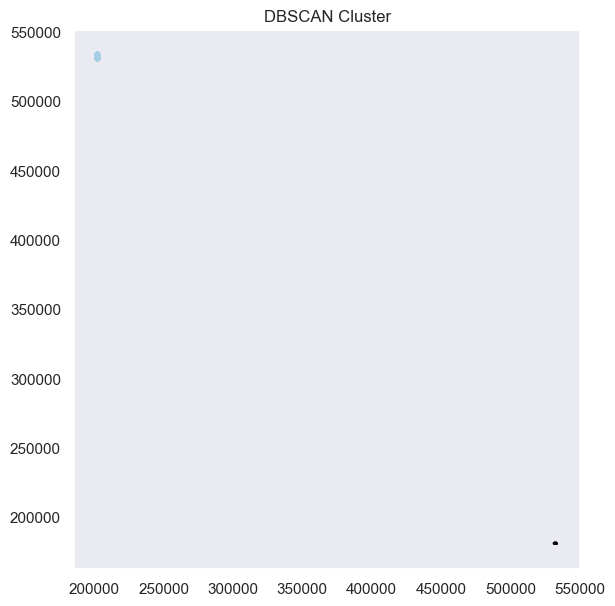

In [173]:
#fitting DBSCAN model using sklearn
from sklearn.cluster import DBSCAN

#play around with the hyperparameter
dbscan_model= DBSCAN(eps=845, min_samples=155, metric='euclidean' ).fit(vso_final) 

#plot
plot(vso_array[:,3:5], dbscan_model.labels_, 'DBSCAN Cluster') 
#selecting all rows and only the latitude and longitude of the array

In [158]:
vso_array

array([[202105.0, 532459.0011416395, 181727.9993500635],
       [202105.0, 533632.0183013633, 180880.05126166478],
       [202105.0, 533816.0135181514, 180899.02510283707],
       ...,
       [202205.0, 532439.0198587497, 181612.97273824102],
       [202205.0, 532753.9775947277, 181257.97764189664],
       [202205.0, 532237.9731312188, 181993.98403484048]], dtype=object)

Hyperparameter use for the DBSCAN are:
- epsilon: 845
- min_samples: 155
- distance metric: euclidean (inser the mathematical equation for this euclidean)



### 9.2 ST-DBSCAN